# Random number generation using `numpy`

The `numpy` module contains a sub-module called `random` which offers us one way to generate random numbers. By default, this uses a [64-bit Permuted Congruential Generator](https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64) (PCG64), rather than the LCG you looked at previously, which is part of a new class of improved pseudo random number generators.

One way we can access the `random` sub-module is using the syntax below:

In [1]:
from numpy import random

This is another way to write an `import` statement where we extract the sub-module directly `from` numpy for use within the code. We can access the functionality within `random` in the same way as we accessed functionality within `numpy` (but this time we use the keyword `random` rather than `np` followed by the `.`).

Considering the concept of a "seed" that we introduced above, this is how we define a seed using the `random` sub-module and use it to start generating random numbers:

In [2]:
seed=10
rng = random.default_rng(seed) # Create Random number generator with default algorithm

print(rng.random())
print(rng.random())
print(rng.random())

0.9560017096289753
0.20768181007914688
0.8284448852745308


What we have done is create a random number generator, `rng`. We can call functions on this object to generate random numbers when we need them. You can see that each time we call `rng.random()` a different number is produced.

Try re-running this cell above. What do you notice? Re-running this cell produces the same set of numbers every time the cell is run. That is because we are re-creating our random number generator, `rng`, and explicitly setting the seed at the start of this cell.

If we don't do that, we would see the following:

In [3]:
print(rng.random())
print(rng.random())
print(rng.random())

0.14928212308202027
0.5128046164365648
0.13591960402050662


If this cell is re-run then this will keep generating different numbers as it continues to run along the random number generator sequence defined by the underlying algorithm.

The [`random()` function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random) (method) we have used above returns random floats between 0.0 and up to, but not including, 1.0. This is done in a uniform manner where, in principle, all numbers should be equally likely.

---

### Exercise A

Use this Python documentation page for the `random()` function for reference: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html

 1. How could we use the `random()` function, which randomly samples from 0.0 - 1.0, to produce values in the range:
   - 0.0 - 3.0?
   - 1.0 - 5.0?
 2. How could you use the `random()` function to generate multiple random numbers at once:
   - 6 numbers?
   - on a 3 x 2 grid?

In [4]:
## CAN ADD CODE HERE

In [5]:
## CAN ADD CODE HERE

In [6]:
## CAN ADD CODE HERE

In [7]:
## CAN ADD CODE HERE

---

### Other ways to generate random numbers

As shown above, we can use the `random()` function to generate different ranges and multiple random numbers at once using an underlying random number generator (`rng`). 

We can also use the same random number generator (`rng`) to derive random numbers in different ways. If we wanted to explicitly choose an integer from a range we can use the [`integers()` function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) (method). This returns random integers from `low` (included) to `high` (not included) by default.

In [8]:
low = 1
high = 11
# From low (inclusive) to high (exclusive)
print(rng.integers(low,high))

# From 0 (inclusive) to high (exclusive)
print(rng.integers(high))

# From 0 (inclusive) to high (inclusive) because endpoint is set to True
print(rng.integers(low,high,endpoint=True))

5
7
5


We can also make a choice from a pre-created range using the [`choice()` function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html) (method):

In [9]:
list1 = ["left","right","up","down"]

print(rng.choice(list1))
print(rng.choice(list1))
print(rng.choice(list1))

down
left
right


One thing to note is that all of these options select random numbers from the same underlying distribution - a *uniform* one. This means that all choices are equally weighted whether its selecting from floats in a range or selecting from choices in a list. This does not mean, however, that every choice will appear the same number of times but that there is an even chance for any option to be made. This can be demonstrated by looking at the distribution of randomly generated numbers with the `random()` function (method) as a histogram using the `hist` function from `matplotlib`:

In [10]:
from numpy import random

rng = random.default_rng() # Create Random number generator with default algorithm

number_of_points = 10000
mean = 0.5
std = 0.2
uniform = rng.random(size=number_of_points)
normal = rng.normal(mean, std, size=number_of_points)

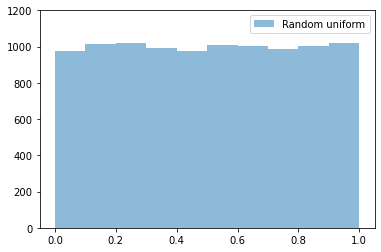

In [11]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.hist(uniform, alpha=0.5, label="Random uniform")
ax.set_ylim(0,1200)
ax.legend()

Even for 10,000 points, this distribution is not completely flat and some numbers are chosen a little more often that others. But overall, you can see there is no strong bias from one number to another.

---

### Exercise B

1. How would you generate a random selection of integers:
   - from 10 - 100
   - generate 10 numbers, from 10 - 100
2. Can you make 5 random choices from `list1` (defined above) in one line?
3. Could you use the `integers()` function (rather than `choice()`) to make a random selection from a `list1`?

In [12]:
## CAN ADD CODE HERE

In [13]:
## CAN ADD CODE HERE

In [14]:
## CAN ADD CODE HERE

In [15]:
## CAN ADD CODE HERE

---

### Extra: Other distributions

As well as using our random number generator (`rng`) to produce values within a uniform distribution, there are also other underlying distributions that can be used.

Full list of distributions available in `numpy.random`: https://numpy.org/doc/stable/reference/random/generator.html#distributions

In [16]:
from numpy import random

In [17]:
rng = random.default_rng() # Create Random number generator with default algorithm

number_of_points = 10000
mean = 0.5
std = 0.2
uniform = rng.random(size = number_of_points) # Generate random numbers from a uniform distribution
normal = rng.normal(mean, std, size = number_of_points) # Generate random numbers from a normal (Gaussian) distribution

Here we have created two sets of random numbers, one using the `random()` function and the other using the `normal()` function. If we look at the first 10 entries for both outputs we can see they are both just arrays which contain float values:

In [18]:
print(uniform[0:10])
print(normal[0:10])

[0.87706318 0.8650918  0.1489432  0.15963612 0.91030455 0.38823493
 0.40912808 0.73992613 0.87552279 0.72349483]
[0.25533285 0.70584539 0.29520917 0.52672493 0.30053038 0.31160242
 0.74923152 0.81436632 0.56547168 0.53257519]


But if we plot these distributions as a histogram, using the matplotlib [hist()](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) function, we can see the differences between these two sets of random numbers:

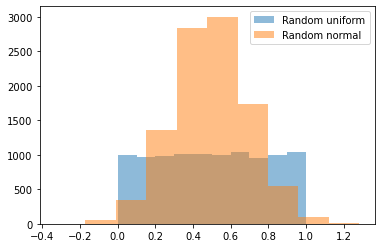

In [19]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.hist(uniform, alpha=0.5, label="Random uniform")
ax.hist(normal, alpha=0.5, label="Random normal")

ax.legend()

Both of these sets of random numbers contain the same number of points but have been randomly generated using different underlying distributions and so could be used to represent different physical processes.

---

*Extended*: have a look at the full list of distributions available in `numpy.random`: https://numpy.org/doc/stable/reference/random/generator.html#distributions

1. For an underlying exponential distribution, generate the same number of random points (`number_of_points`) as the uniform distribution above. Set the scale parameters to be 0.1 and call output variable `exponential`. Use the code below to plot a comparison as a histogram.
2. Can you generate an exponential-like distribution using values from the `random()` function?

In [20]:
## CAN ADD CODE HERE

In [21]:
### UNCOMMENT AND USE TO PLOT COMPARISON WITH UNIFORM DISTRIBUTION
#import matplotlib.pyplot as plt
#
#fig,ax = plt.subplots()
#
#ax.hist(uniform, alpha=0.5, color="C0", label="Random uniform")
#ax.hist(exponential, alpha=0.5, color="C2", label="Random exponential")
#
#ax.legend()

---